In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('375.csv')

# Convert labels to 0 and 1
data['label'] = (data['label'] == 1).astype(int)

# Split the data into features and labels
X = data['message']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Multinomial NB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate performance
acc_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f'Accuracy (Multinomial NB): {acc_nb:.4f}')
print('Classification Report:')
print(report_nb)


Accuracy (Multinomial NB): 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        70
           1       0.00      0.00      0.00         7

    accuracy                           0.91        77
   macro avg       0.45      0.50      0.48        77
weighted avg       0.83      0.91      0.87        77



C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

Accuracy(Bidirectional Long Short-Term Memory [LSTM]): 0.9221
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        70
         1.0       1.00      0.14      0.25         7

    accuracy                           0.92        77
   macro avg       0.96      0.57      0.60        77
weighted avg       0.93      0.92      0.89        77

Confusion Matrix:
 [[70  0]
 [ 6  1]]


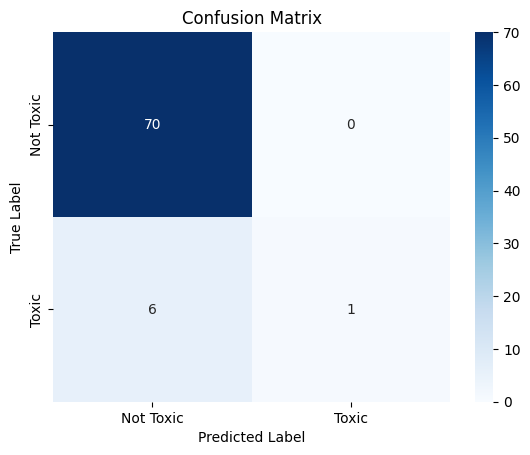

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("375.csv")

# Preprocess the data
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Extract features and labels
X = df['message']
y = df['label']

# Use CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Bidirectional LSTM model
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Corrected indexing
        out = self.sigmoid(out)
        return out

# Initialize the model, loss function, and optimizer
input_size = X.shape[1]
hidden_size = 128
num_layers = 2
output_size = 1

model = BiLSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(inputs.unsqueeze(1))  # Add an extra dimension for the sequence length
        loss = criterion(outputs.squeeze(), labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred = model(X_test.unsqueeze(1))

y_pred = (y_pred > 0.5).float()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy(Bidirectional Long Short-Term Memory [LSTM]): {accuracy:.4f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

# Display the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Toxic", "Toxic"], yticklabels=["Not Toxic", "Toxic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('375.csv')

# Convert labels to 0 and 1
data['label'] = (data['label'] == 1).astype(int)

# Split the data into features and labels
X = data['message']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM with Linear Kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate performance
acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy (SVM with Linear Kernel): {acc_svm:.4f}')
print('Classification Report:')
print(report_svm)


Accuracy (SVM with Linear Kernel): 0.9351
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        70
           1       1.00      0.29      0.44         7

    accuracy                           0.94        77
   macro avg       0.97      0.64      0.70        77
weighted avg       0.94      0.94      0.92        77



In [25]:
import torchtext
print(torchtext.__version__)

0.16.1+cpu
